In [34]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
# Libraries for handling/eliminating stopworads.
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from posixpath import join
import math
import random
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet 
import matplotlib.pyplot as plt 
from nltk.tokenize import RegexpTokenizer
import os
#SVM
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn import svm
#Navi Bayes
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing train_data.csv
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
from google.colab import files
product_review_dataset = files.upload()

Saving Flipkart_Reviews_Electronics.csv to Flipkart_Reviews_Electronics.csv


In [35]:
# Here we are reading the CSV file we just imported.
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
import io
import pandas as pd
review_df = pd.read_csv(io.BytesIO(product_review_dataset['Flipkart_Reviews_Electronics.csv']))
print(review_df)

            product_id                                      product_title  \
0     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
...                ...                                                ...   
9369  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9370  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9371  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9372  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9373  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   

      rating               summary  \
0          5     Terrific purchase   

In [36]:
review_df.head(5)

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114


In [37]:
review_df.isna().sum()

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64

In [40]:
review_df.info()
len(review_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     9374 non-null   object
 1   product_title  9374 non-null   object
 2   rating         9374 non-null   int64 
 3   summary        9374 non-null   object
 4   review         9374 non-null   object
 5   location       8081 non-null   object
 6   date           9374 non-null   object
 7   upvotes        9374 non-null   int64 
 8   downvotes      9374 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 659.2+ KB


9374

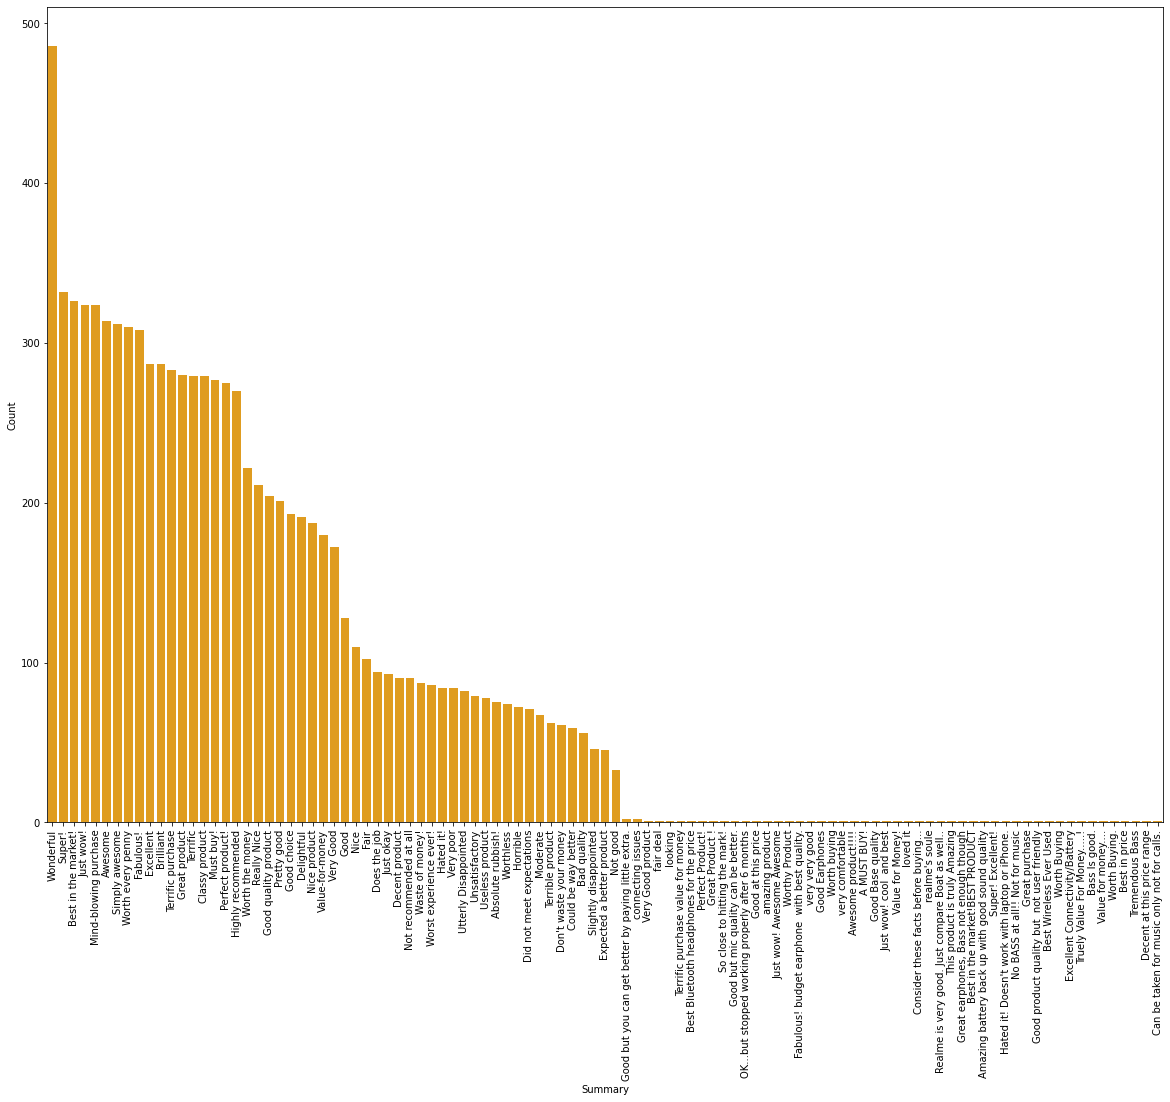

In [42]:
plt.figure(figsize = (20,15))
freq = review_df.summary.value_counts()
sns.barplot(x = freq.index, y = freq, color = "orange")
plt.xlabel("Summary")
plt.ylabel("Count")
plt.xticks(rotation = 90);

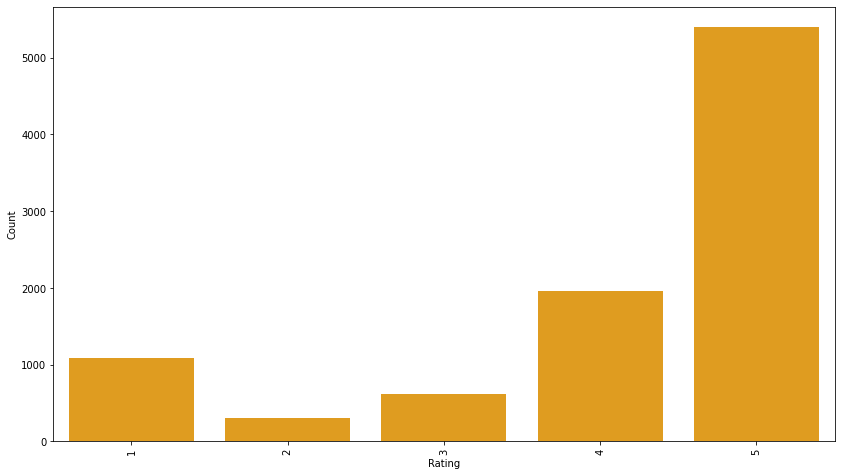

In [43]:
plt.figure(figsize = (14,8))
freq = review_df.rating.value_counts()
sns.barplot(x = freq.index, y = freq, color = "orange")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 90);

In [45]:
# Combining all colomns to make classification easier.
# Summary
concanitated_df = pd.DataFrame()
concanitated_df['my_data_summary'] = review_df['product_id'] + ' ' + review_df['product_title'] + ' ' + str(review_df['rating']) + ' ' + review_df['summary'] + ' ' + review_df['review'] + ' ' + review_df['location'] + ' ' + str(review_df['date']) + ' ' + str(review_df['upvotes']) + ' ' + str(review_df['downvotes'])
concanitated_df['summary'] = review_df['summary']

# Rating
concatinated_df_rating = pd.DataFrame()
concatinated_df_rating['my_data_rating'] = review_df['product_id'] + ' ' + review_df['product_title'] + ' ' + str(review_df['rating']) + ' ' + review_df['summary'] + ' ' + review_df['review'] + ' ' + review_df['location'] + ' ' + str(review_df['date']) + ' ' + str(review_df['upvotes']) + ' ' + str(review_df['downvotes'])
concatinated_df_rating['rating'] = review_df['rating']

In [47]:
# First 5 rows after combining.
concanitated_df.head(5)

,my_data_summary,summary
0,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase
1,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase
2,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!
3,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!
4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase


In [48]:
# First 5 rows after combining.
concatinated_df_rating.head(5)

,my_data_rating,rating
0,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5
1,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5
2,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5
3,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5
4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5


In [49]:
print("Information about my_data colomn based on summary")
concanitated_df.info()
print()
print("##########################################")
print()
print("Information about my_data colomn based on rating")
concatinated_df_rating.info()

Information about my_data colomn based on summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   my_data_summary  8081 non-null   object
 1   summary          9374 non-null   object
dtypes: object(2)
memory usage: 146.6+ KB

##########################################

Information about my_data colomn based on rating
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   my_data_rating  8081 non-null   object
 1   rating          9374 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 146.6+ KB


In [52]:
# Removal of NAN | makes training easy
concanitated_df.fillna(" ", inplace = True) # From Summary Parametr
concatinated_df_rating.fillna("", inplace = True) # From Rating Parametr

In [54]:
# Removing stopwords
import re
# Reference: https://www.kaggle.com/code/devashishpandit/naive-bayes-on-news-category-dataset
print(", ".join(stopwords.words('english')))
same = set(stopwords.words('english'))

def preprocessing(p_reviews):
    p_reviews = " ".join([word for word in str(p_reviews).split() 
    if word not in same])
    p_reviews = re.sub(r'[^A-Za-z0-9 ]+', 
                       '',
                       p_reviews)
    return p_reviews

# I am basically creating a new coloumn of concatinated data on which we will follow our analysis.
concanitated_df['no_stop_words_data'] = concanitated_df['my_data_summary'].apply(preprocessing)
concatinated_df_rating['no_stop_words_data'] = concatinated_df_rating['my_data_rating'].apply(preprocessing)

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [55]:
# As you can see we a seperate colomn were no stop words are involved.
concanitated_df.head(15)
# Consider row #1 my_data colomn here you can see that we have stop words like "with'.
# Now compair this colomn with no_stop_words_data colomn, here can see that we don't have those kind of words.

,my_data_summary,summary,no_stop_words_data
0,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
1,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
2,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
3,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Wonderful,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
6,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Pretty good,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
7,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
8,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Delightful,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
9,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Worthless,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...


In [57]:
concatinated_df_rating.head(15)

,my_data_rating,rating,no_stop_words_data
0,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
1,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
2,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
3,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
6,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
7,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
8,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
9,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,1,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...


In [60]:
# Here we divide/split dataset into train, validate and test. The division is as follows - 60% is Training data, 20% Validation and 20% for Testing.
def data_spliter_summary():
  
  train_s, validate_s, test_s = \
              np.split(concanitated_df.sample(frac=1, random_state=42), 
                       [int(.6*len(concanitated_df)), int(.8*len(concanitated_df))])                        
  
  return train_s, validate_s, test_s

t_summary_df = TfidfVectorizer(decode_error = 'ignore')
X = t_summary_df.fit_transform(concanitated_df['my_data_summary'].values.astype('U'))
X.shape
Y = concanitated_df['summary'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6 , random_state = 122)

def data_spliter_rating():

  train_r, validate_r, test_r = \
              np.split(concatinated_df_rating.sample(frac=1, random_state=42), 
                       [int(.6*len(concatinated_df_rating)), int(.8*len(concatinated_df_rating))])
              
  return train_r, validate_r, test_r

def tokenizer(word_lib, statements):
  for i in statements:
        tokenized_statments = word_tokenize(i)
        for i in tokenized_statments:
            if(i.isalpha() and len(i) < 15 and i.lower()):
                word_lib.append(ps.stem(i))
  return Counter(word_lib)

t_rating_df = TfidfVectorizer(decode_error = 'ignore')
x = t_rating_df.fit_transform(concatinated_df_rating['my_data_rating'].values.astype('U'))
x.shape
y = concatinated_df_rating['rating'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.6 , random_state = 122)

In [61]:
train_s, validate_s, test_s = data_spliter_summary()
train_r, validate_r, test_r = data_spliter_rating()
print(f"Details with parameter summary in consideration.")
print(f"Length of train: {len(train_s)}")
print(f"Length of validate: {len(validate_s)}")
print(f"Length of test: {len(test_s)}")
print()
print(f"Details with parameter rating in consideration.")
print(f"Length of train: {len(train_r)}")
print(f"Length of validate: {len(validate_r)}")
print(f"Length of test: {len(test_r)}")

Details with parameter summary in consideration.
Length of train: 5624
Length of validate: 1875
Length of test: 1875

Details with parameter rating in consideration.
Length of train: 5624
Length of validate: 1875
Length of test: 1875


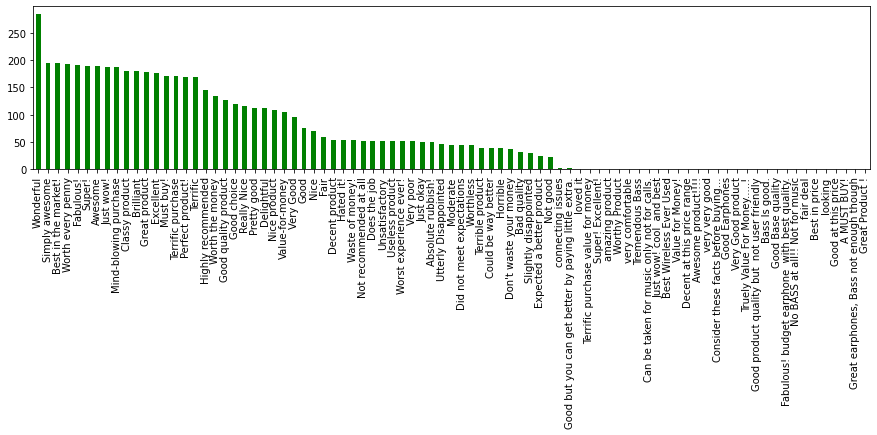

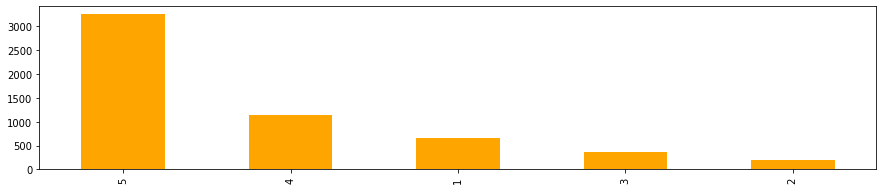

In [62]:
# Plotting to analyse train dataset
plt.figure(figsize=(15, 3))
train_s['summary'].value_counts().plot(kind='bar', color = "green")
plt.figure(figsize=(15, 3))
train_r['rating'].value_counts().plot(kind='bar', color = "orange")

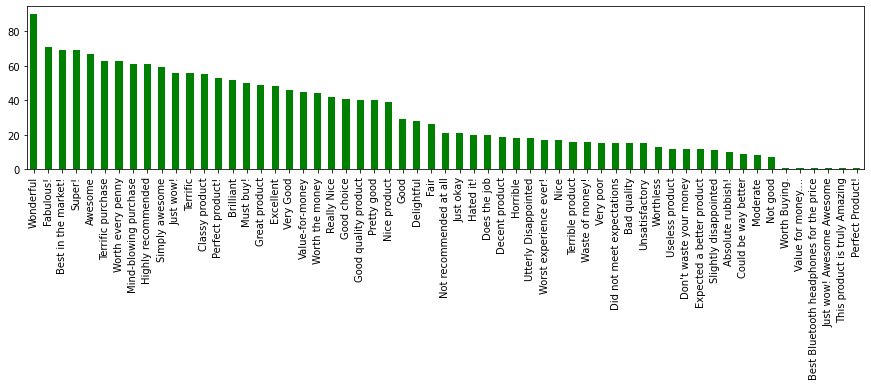

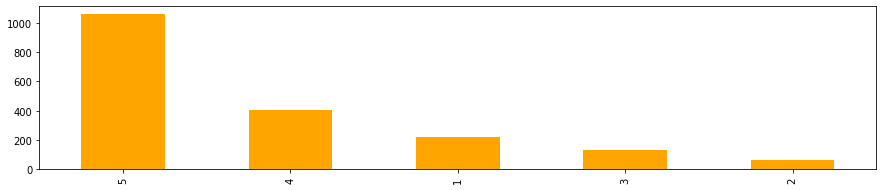

In [64]:
# Plotting to analyse validate dataset
plt.figure(figsize=(15, 3))
validate_s['summary'].value_counts().plot(kind='bar', color = "green")
plt.figure(figsize=(15, 3))
validate_r['rating'].value_counts().plot(kind='bar', color = "orange")

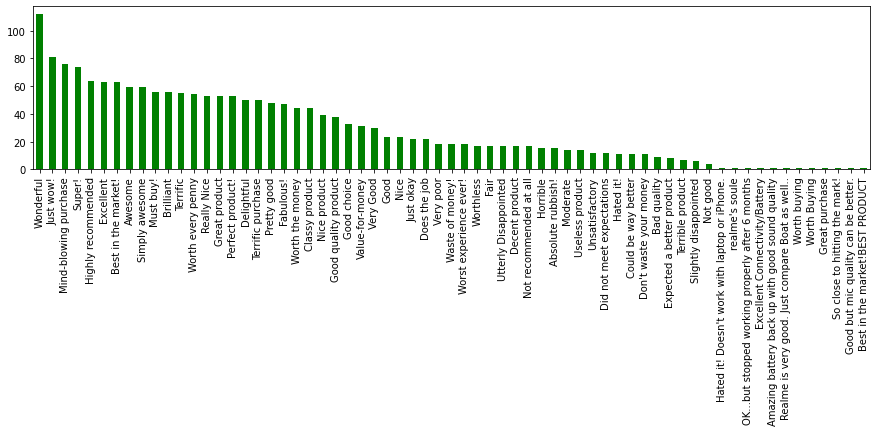

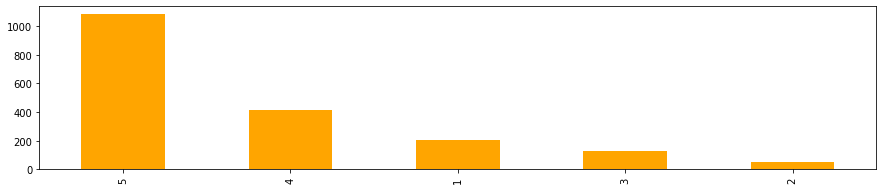

In [65]:
# Plotting to analyse test dataset
plt.figure(figsize=(15, 3))
test_s['summary'].value_counts().plot(kind='bar', color = "green")
plt.figure(figsize=(15, 3))
test_r['rating'].value_counts().plot(kind='bar', color = "orange")

In [66]:
# Creating a main dictionary | to count the word occurences/freq in a particular parameter value.
main_dictionary = {}
def add_to_dic(area):    
    word_lib = []
    statements = area
    return tokenizer(word_lib, statements)

In [68]:
for area_summary in train_s["summary"].unique():
    category_suspended_summary = train_s[train_s["summary"] == area_summary]
    temp_dict_summary = add_to_dic(category_suspended_summary["my_data_summary"])
    main_dictionary[area_summary]= temp_dict_summary

for area_rating in train_r["rating"].unique():
    category_suspended_rating = train_r[train_r["rating"] == area_rating]
    temp_dict_rating = add_to_dic(category_suspended_rating["my_data_rating"])
    main_dictionary[area_rating]= temp_dict_rating

In [69]:
# Dictionary to DataFram Conversion
word_frequency_df_together = pd.DataFrame(main_dictionary).fillna(0)
word_frequency_df_together

,Awesome,Expected a better product,Just wow!,Hated it!,Mind-blowing purchase,Excellent,Fabulous!,Really Nice,Worth every penny,Very Good,...,Best Wireless Ever Used,Value for Money!,Awesome product!!!!,Decent at this price range,Great Product !,5,2,1,4,3
boat,84.0,11.0,95.0,23.0,81.0,77.0,54.0,58.0,91.0,39.0,...,0.0,0.0,1.0,0.0,0.0,1295.0,81.0,262.0,504.0,161.0
basshead,22.0,2.0,25.0,1.0,22.0,27.0,13.0,16.0,21.0,12.0,...,0.0,0.0,1.0,0.0,0.0,359.0,7.0,10.0,147.0,41.0
wire,43.0,5.0,40.0,5.0,50.0,46.0,37.0,36.0,39.0,32.0,...,0.0,1.0,1.0,1.0,0.0,784.0,21.0,60.0,339.0,75.0
headset,177.0,20.0,171.0,45.0,174.0,175.0,168.0,110.0,173.0,90.0,...,1.0,1.0,1.0,1.0,0.0,3041.0,172.0,596.0,1073.0,303.0
name,648.0,81.0,640.0,176.0,669.0,652.0,624.0,428.0,648.0,344.0,...,4.0,4.0,4.0,4.0,0.0,11417.0,658.0,2264.0,4055.0,1162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inifin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
pur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
dahod,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
aesthet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# **Naive Bayes Text Classifier**

In [70]:
target_X = [X_train, X_test]
target_x = [x_train, x_test]
target_Y = [Y_train, Y_test]
target_y = [x_train, x_test]

In [71]:
# Applying Naive Bayes On Summary Parameter.
Naive_Bayes_Classification = MultinomialNB()
print("Summary Parameter Comsideration")
Naive_Bayes_Classification.fit(target_X[0],target_Y[0])
Naive_Bayes_Classification = Naive_Bayes_Classification.predict(target_X[1])
print(classification_report(target_Y[1], Naive_Bayes_Classification))
final_accuracy = accuracy_score(target_Y[1], Naive_Bayes_Classification)
print(f"Accuracy after applying Naive Bayes Classifier: {round(final_accuracy * 100)}%")

Summary Parameter Comsideration


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                     precision    recall  f1-score   support

                                        A MUST BUY!       0.00      0.00      0.00         1
                                  Absolute rubbish!       0.00      0.00      0.00        42
    Amazing battery back up with good sound quality       0.00      0.00      0.00         1
                                            Awesome       0.00      0.00      0.00       194
                                Awesome product!!!!       0.00      0.00      0.00         1
                                        Bad quality       0.00      0.00      0.00        33
                                      Bass Is good.       0.00      0.00      0.00         1
            Best Bluetooth headphones for the price       0.00      0.00      0.00         1
                            Best Wireless Ever Used       0.00      0.00      0.00         1
                                Best in the market!       0.00      0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Applying Naive Bayes On Rating Parameter.
Naive_Bayes_Classification = MultinomialNB()
print("Rating Parameter Comsideration")
Naive_Bayes_Classification.fit(x_train,y_train)
Naive_Bayes_Classification = Naive_Bayes_Classification.predict(target_x[1])
print(classification_report(y_test, Naive_Bayes_Classification))
final_accuracy = accuracy_score(y_test, Naive_Bayes_Classification)
print(f"Accuracy after applying Naive Bayes Classifier: {round(final_accuracy * 100)}%")

Rating Parameter Comsideration
              precision    recall  f1-score   support

           1       1.00      0.00      0.00       641
           2       0.00      0.00      0.00       180
           3       0.00      0.00      0.00       379
           4       0.00      0.00      0.00      1159
           5       0.58      1.00      0.73      3266

    accuracy                           0.58      5625
   macro avg       0.32      0.20      0.15      5625
weighted avg       0.45      0.58      0.43      5625

Accuracy after applying Naive Bayes Classifier: 58%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy increased when Navie Bayes Classification is applied using ratings colomn when compaired against summary colomn.

# SVM Model

In [73]:
# Applying SVM to Summary and Rating Parameter
svm_classification_summary = svm.SVC(kernel='linear')
svm_classification_summary.fit(X_train, Y_train)
svm_classification_rating = svm.SVC(kernel='linear')
svm_classification_rating.fit(x_train, y_train)
SVM_Summary = svm_classification_summary.predict(X_test)
SVM_Rating = svm_classification_rating.predict(x_test)

In [74]:
print("Summary Parameter Consideration")
print(classification_report(Y_test, SVM_Summary))
SVM_accuracy = metrics.accuracy_score(Y_test, SVM_Summary) * 100
print(f"Accuracy after applying SVM: {SVM_accuracy}%")

Summary Parameter Consideration
                                                     precision    recall  f1-score   support

                                        A MUST BUY!       0.00      0.00      0.00         1
                                  Absolute rubbish!       1.00      0.86      0.92        42
    Amazing battery back up with good sound quality       0.00      0.00      0.00         1
                                            Awesome       0.52      0.56      0.54       194
                                Awesome product!!!!       0.00      0.00      0.00         1
                                        Bad quality       0.75      0.18      0.29        33
                                      Bass Is good.       0.00      0.00      0.00         1
            Best Bluetooth headphones for the price       0.00      0.00      0.00         1
                            Best Wireless Ever Used       0.00      0.00      0.00         1
                                Best 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print("Rating Parameter Consideration")
print(classification_report(y_test, SVM_Rating))
SVM_accuracy = metrics.accuracy_score(y_test, SVM_Rating) * 100
print(f"Accuracy after applying SVM: {SVM_accuracy}%")

Rating Parameter Consideration
              precision    recall  f1-score   support

           1       0.90      0.80      0.85       641
           2       0.97      0.42      0.59       180
           3       0.93      0.33      0.49       379
           4       0.73      0.58      0.65      1159
           5       0.80      0.96      0.87      3266

    accuracy                           0.80      5625
   macro avg       0.87      0.62      0.69      5625
weighted avg       0.81      0.80      0.79      5625

Accuracy after applying SVM: 80.17777777777778%


Accuracy increased after using SVM model and it further increased when classification was done using ratings colomn.